<a href="https://colab.research.google.com/github/mk7890/Resume-Parsing-System/blob/main/ResumeParsingSystem_DataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Overview
Resume Parsing System

The system will include text extraction, entity recognition, data cleaning, synthetic data generation to fill in missing values to get a structured tabular dataset.

📌 Project Breakdown & Approach

1. Load and Process Resumes (PDF Dataset)

✅ Load resume PDFs from a dataset

✅ Extract text using pdfplumber and PyMuPDF (fitz).

✅ Save extracted text to a CSV file

✅ Combine Dataset (extracted dataset + large dataset)

2. Data Cleaning

✅ Remove Special Characters on the feature column. This column contains all resume text. The other column contains job designations.

3. Data Preprocessing : apply lemmatization on feature column. Stop words removal is not done as it can compromise NLP model accuracy.

4. Named Entity Recognition (NER) Model for Feature Extraction

✅ Build an NLP-based Resume Parsing Model using:
spaCy and hugging face transformers (NER for extracting applicant details)

✅ Extract all key details (Name, Job Title, Skills, Experience, Education, etc.)

✅ Generate synthetic values for missing fields using:
Faker (for realistic names, emails, phone numbers)



# Load Libraries

Install Dependancies

In [ ]:
!pip install pdfplumber pandas faker tqdm
!pip install pymupdf pdfplumber
!pip install sentence_transformers
!pip install fpdf
!pip install faker
!pip install pymupdf pdfplumber
!pip install pdfminer.six spacy faker joblib pandas numpy scikit-learn torch transformers streamlit
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 71.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 92.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211

# Load Dataset
Load and Extract Text from PDF Resumes. I used pdfplumber for accurate extraction.

Load Large dataset saved on google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pdfplumber pymupdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 66.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 52.4 MB/s eta 0:00:00


In [3]:
!pip install fpdf

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=e96ae24c4030f0e363ab2a4e42c9b5f28ebc86eb5b3017b9ece175850b062396
  Stored in directory: /root/.cache/pip/wheels/65/4f/66/bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built fpdf


In [4]:
import gdown

# Replace 'FILE_ID' with the actual file ID from your link
file_id2 = "1vAaazotBSAS6tAZ17l6d1x7rCjzRp5te"
output_filename2 = "resume_dataset_with_features.csv"  # Change to desired output filename

# Construct the download URL
url = f"https://drive.google.com/uc?id={file_id2}"

# Download the file
gdown.download(url, output_filename2, quiet=False)

print(f"File downloaded as: {output_filename2}")

Downloading...
From (original): https://drive.google.com/uc?id=1vAaazotBSAS6tAZ17l6d1x7rCjzRp5te
From (redirected): https://drive.google.com/uc?id=1vAaazotBSAS6tAZ17l6d1x7rCjzRp5te&confirm=t&uuid=5c33a54b-08b7-47b9-8333-c8fac658c6ed
To: /content/resume_dataset_with_features.csv
100%|██████████| 638M/638M [00:10<00:00, 63.4MB/s]

File downloaded as: resume_dataset_with_features.csv


In [5]:
import os
import pdfplumber
import pandas as pd
import re
import spacy
from tqdm import tqdm
from fpdf import FPDF

In [7]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 17.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [8]:
# Load NLP model for better name extraction
nlp = spacy.load("en_core_web_md")

folder_path = "/content/drive/MyDrive/resume_datasets_archive/data"
clean_folder_path = "/content/drive/MyDrive/resume_datasets_archive/clean_resumes"
os.makedirs(clean_folder_path, exist_ok=True)

Extract text from all pdf files in google drive folder

In [9]:
import os
import fitz  # PyMuPDF
import pdfplumber
import pandas as pd
from tqdm import tqdm

# Define folder path
folder_path = "/content/drive/MyDrive/resume_datasets_archive/data"
output_csv = "/content/raw_resume_data.csv"

# Function to extract text using a hybrid approach
def extract_text_from_pdf(pdf_path):
    text = ""

    # Try extracting with PyMuPDF (fitz)
    try:
        with fitz.open(pdf_path) as doc:
            text = "\n".join([page.get_text("text") for page in doc])
    except Exception as e:
        print(f"PyMuPDF failed for {pdf_path}: {e}")

    # Fallback to pdfplumber if PyMuPDF fails
    if not text.strip():
        try:
            with pdfplumber.open(pdf_path) as pdf:
                text = "\n".join([page.extract_text() for page in pdf.pages if page.extract_text()])
        except Exception as e:
            print(f"pdfplumber failed for {pdf_path}: {e}")

    return text.strip() if text else None

# List all PDF files in the folder
pdf_files = [f for f in os.listdir(folder_path) if f.endswith(".pdf")]

# Initialize list to store extracted data
resume_data = []

# Extract text from each PDF file with progress bar
for pdf_file in tqdm(pdf_files, desc="Extracting Text", unit="file"):
    pdf_path = os.path.join(folder_path, pdf_file)
    extracted_text = extract_text_from_pdf(pdf_path)
    if extracted_text:  # Ensure only non-empty text is stored
        resume_data.append({"filename": pdf_file, "text": extracted_text})

# Convert to DataFrame and save to CSV
df = pd.DataFrame(resume_data)
df.to_csv(output_csv, index=False, encoding="utf-8")

print(f"Extraction complete! Data saved to {output_csv}")


Extracting Text: 100%|██████████| 2484/2484 [01:45<00:00, 23.57file/s]


Extraction complete! Data saved to /content/raw_resume_data.csv


Previewing the Raw Resume Data

In [10]:
raw_resume = pd.read_csv("/content/raw_resume_data.csv")
raw_resume.head(10)

,filename,text
0,FINANCE (21).pdf,FINANCE AND OPERATIONS MANAGER\nExperience\nFi...
1,ENGINEERING (61).pdf,ENGINEERING TECHNICIAN\nSummary\nTo obtain a p...
2,FITNESS (24).pdf,"INTERN\nSummary\nMotivated, responsible Person..."
3,FINANCE (57).pdf,OPERATIONS FINANCE DIRECTOR\nSummary\nSkilled ...
4,DIGITAL_MEDIA (1).pdf,MEDIA ACTIVITIES SPECIALIST\nSummary\nMulti-Ta...
5,CONSULTANT (114).pdf,CONSULTANT\nSummary\nResults-oriented Californ...
6,DIGITAL_MEDIA (43).pdf,MEDIA SUPPORT SPECIALIST\nProfessional Summary...
7,FINANCE (59).pdf,FINANCE MANAGER FINANCE MANAGER\nExecutive Pro...
8,FITNESS (30).pdf,REHABILITATION SPECIALIST / MASSAGE THERAPIST\...
9,FINANCE (108).pdf,FINANCE MANAGER\nSummary\npreparing annual bud...


In [11]:
raw_resume.columns

Index(['filename', 'text'], dtype='object')

In [14]:
import pandas as pd
import re

df = raw_resume

# Function to clean the filename column
def clean_filename(filename):
    # Remove the part starting with the brackets and ending with .pdf
    cleaned_name = re.sub(r'\s*\(.*?\)\.pdf$', '', filename)
    # Replace underscores with a single space
    cleaned_name = cleaned_name.replace('_', ' ')
    return cleaned_name

# Apply the function to the filename column and create a new column 'cleaned_filename'
df['cleaned_filename'] = df['filename'].apply(clean_filename)

# Print the updated DataFrame
df.head()


,filename,text,cleaned_filename
0,FINANCE (21).pdf,FINANCE AND OPERATIONS MANAGER\nExperience\nFi...,FINANCE
1,ENGINEERING (61).pdf,ENGINEERING TECHNICIAN\nSummary\nTo obtain a p...,ENGINEERING
2,FITNESS (24).pdf,"INTERN\nSummary\nMotivated, responsible Person...",FITNESS
3,FINANCE (57).pdf,OPERATIONS FINANCE DIRECTOR\nSummary\nSkilled ...,FINANCE
4,DIGITAL_MEDIA (1).pdf,MEDIA ACTIVITIES SPECIALIST\nSummary\nMulti-Ta...,DIGITAL MEDIA


In [15]:
# dropping the filename column and renaming the cleaned_filename column to "Job Role"
df = df.drop(columns=['filename'])
df = df.rename(columns={'cleaned_filename': 'Job Role'})
df.head()

,text,Job Role
0,FINANCE AND OPERATIONS MANAGER\nExperience\nFi...,FINANCE
1,ENGINEERING TECHNICIAN\nSummary\nTo obtain a p...,ENGINEERING
2,"INTERN\nSummary\nMotivated, responsible Person...",FITNESS
3,OPERATIONS FINANCE DIRECTOR\nSummary\nSkilled ...,FINANCE
4,MEDIA ACTIVITIES SPECIALIST\nSummary\nMulti-Ta...,DIGITAL MEDIA


In [16]:
# Rearranging the columns to start with "Job Role" followed by text
df = df[['Job Role', 'text']]
df.head()

,Job Role,text
0,FINANCE,FINANCE AND OPERATIONS MANAGER\nExperience\nFi...
1,ENGINEERING,ENGINEERING TECHNICIAN\nSummary\nTo obtain a p...
2,FITNESS,"INTERN\nSummary\nMotivated, responsible Person..."
3,FINANCE,OPERATIONS FINANCE DIRECTOR\nSummary\nSkilled ...
4,DIGITAL MEDIA,MEDIA ACTIVITIES SPECIALIST\nSummary\nMulti-Ta...


In [17]:
df.to_csv('/content/raw_pdftext_resume_data.csv', index=False)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483 entries, 0 to 2482
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Job Role  2483 non-null   object
 1   text      2483 non-null   object
dtypes: object(2)
memory usage: 38.9+ KB


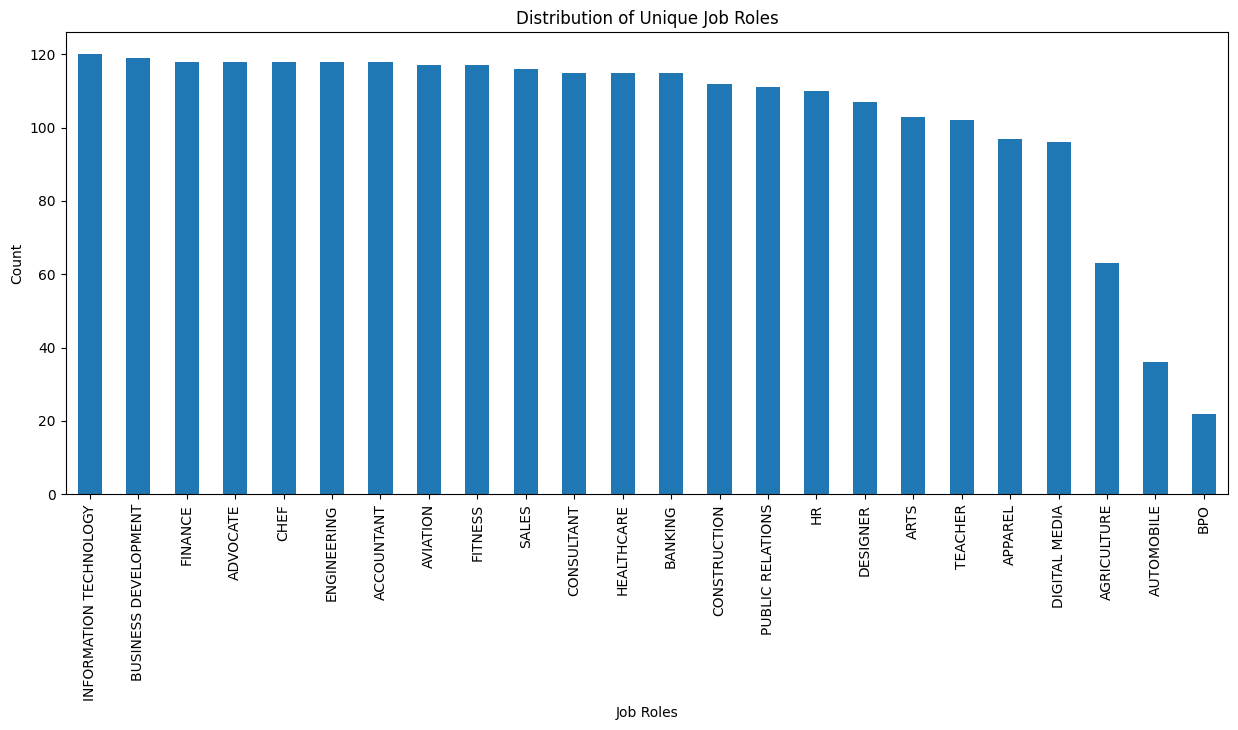

In [21]:
#Visualization of Job Role Column Unique features count using matplotlib
import matplotlib.pyplot as plt

job_counts = df['Job Role'].value_counts()
plt.figure(figsize=(15, 6))
job_counts.plot(kind='bar')
plt.title('Distribution of Unique Job Roles')
plt.xlabel('Job Roles')
plt.ylabel('Count')
#plt.xticks(rotation=45)
plt.show()


In [22]:
!pip install wordcloud


In [23]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

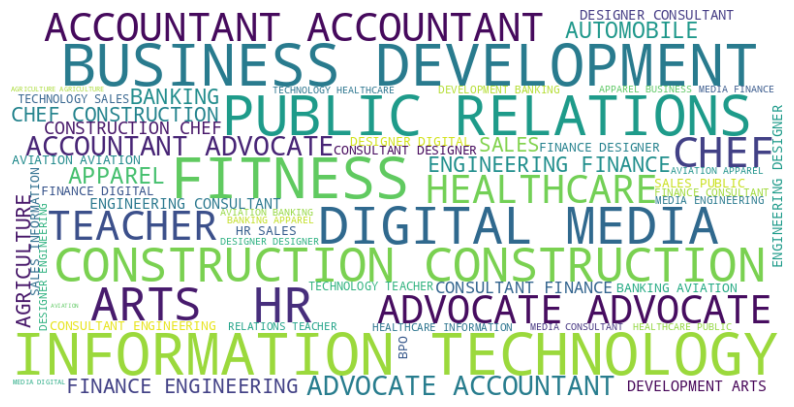

In [24]:
text = " ".join(job for job in df['Job Role'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Data Cleaning

In [25]:
df.columns

Index(['Job Role', 'text'], dtype='object')

In [27]:
import spacy
import pandas as pd
from tqdm import tqdm

# Load SpaCy medium model
nlp = spacy.load("en_core_web_md")

# Initialize tqdm for progress tracking
tqdm.pandas()

# Function to clean text using SpaCy
def clean_text_spacy(text):
    doc = nlp(text.lower())  # Convert to lowercase
    return " ".join([token.text for token in doc if not token.is_stop and token.is_alpha])  # Remove stopwords & special characters

# Apply function with progress bar
df['cleaned_text_spacy'] = df['text'].progress_apply(clean_text_spacy)

# Display results
df.head()


100%|██████████| 2483/2483 [08:14<00:00,  5.03it/s]


,Job Role,text,cleaned_text_spacy
0,FINANCE,FINANCE AND OPERATIONS MANAGER\nExperience\nFi...,finance operations manager experience finance ...
1,ENGINEERING,ENGINEERING TECHNICIAN\nSummary\nTo obtain a p...,engineering technician summary obtain position...
2,FITNESS,"INTERN\nSummary\nMotivated, responsible Person...",intern summary motivated responsible personal ...
3,FINANCE,OPERATIONS FINANCE DIRECTOR\nSummary\nSkilled ...,operations finance director summary skilled fi...
4,DIGITAL MEDIA,MEDIA ACTIVITIES SPECIALIST\nSummary\nMulti-Ta...,media activities specialist summary multi task...


In [28]:
df.to_csv('/content/stopwordclean_pdftext_resume_data.csv', index=False)

In [29]:
df.columns

Index(['Job Role', 'text', 'cleaned_text_spacy'], dtype='object')

In [30]:
import spacy
import pandas as pd
from tqdm import tqdm  # Import tqdm for progress bar

# Load SpaCy medium model
nlp = spacy.load("en_core_web_md")

# Drop the 'cleaned_text_spacy' column
df = df.drop(columns=['cleaned_text_spacy'])

# Enable tqdm for pandas
tqdm.pandas()

# Function to tokenize and lemmatize text
def tokenize_and_lemmatize(text):
    doc = nlp(text)  # Process text with SpaCy
    return " ".join([token.lemma_ for token in doc if token.is_alpha])  # Keep only words, remove punctuation

# Apply the function to the 'text' column with progress bar
df['lemmatized_text'] = df['text'].progress_apply(tokenize_and_lemmatize)

# Display results
df.head()


100%|██████████| 2483/2483 [08:21<00:00,  4.95it/s]


,Job Role,text,lemmatized_text
0,FINANCE,FINANCE AND OPERATIONS MANAGER\nExperience\nFi...,finance and operation manager Experience Finan...
1,ENGINEERING,ENGINEERING TECHNICIAN\nSummary\nTo obtain a p...,engineer technician summary to obtain a positi...
2,FITNESS,"INTERN\nSummary\nMotivated, responsible Person...",INTERN Summary motivate responsible Personal T...
3,FINANCE,OPERATIONS FINANCE DIRECTOR\nSummary\nSkilled ...,operation finance director summary skilled fin...
4,DIGITAL MEDIA,MEDIA ACTIVITIES SPECIALIST\nSummary\nMulti-Ta...,MEDIA activity specialist summary multi taskin...


In [31]:
# dropping the text column and renaming lemmatized_text column to Features
df = df.drop(columns=['text'])
df = df.rename(columns={'lemmatized_text': 'Features'})
df.head()

,Job Role,Features
0,FINANCE,finance and operation manager Experience Finan...
1,ENGINEERING,engineer technician summary to obtain a positi...
2,FITNESS,INTERN Summary motivate responsible Personal T...
3,FINANCE,operation finance director summary skilled fin...
4,DIGITAL MEDIA,MEDIA activity specialist summary multi taskin...


In [32]:
df.to_csv('/content/lemmatized_pdftext_resume_data.csv', index=False)

Tokenization and Lemmatization of Large Resume dataset

In [41]:
large_resume = pd.read_csv('/content/resume_dataset_with_features.csv')
large_resume.head()

,Role,Features
0,Social Media Manager,5 to 15 Years Digital Marketing Specialist M.T...
1,Frontend Web Developer,"2 to 12 Years Web Developer BCA HTML, CSS, Jav..."
2,Quality Control Manager,0 to 12 Years Operations Manager PhD Quality c...
3,Wireless Network Engineer,4 to 11 Years Network Engineer PhD Wireless ne...
4,Conference Manager,1 to 12 Years Event Manager MBA Event planning...


In [42]:
large_resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615940 entries, 0 to 1615939
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   Role      1615940 non-null  object
 1   Features  1615940 non-null  object
dtypes: object(2)
memory usage: 24.7+ MB


In [43]:
large_resume = large_resume.head(30000)
large_resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Role      30000 non-null  object
 1   Features  30000 non-null  object
dtypes: object(2)
memory usage: 468.9+ KB


In [44]:
import spacy
import pandas as pd
from tqdm import tqdm  # Import tqdm for progress bar

# Load SpaCy medium model
nlp = spacy.load("en_core_web_md")

# Enable tqdm for pandas
tqdm.pandas()

# Function to tokenize and lemmatize text while keeping numbers
def tokenize_and_lemmatize(text):
    doc = nlp(text)  # Process text with SpaCy
    return " ".join([token.lemma_ for token in doc if token.text.isalnum()])  # Keep words & numbers, remove special characters

# Apply the function to the 'text' column with a progress bar
large_resume['lemmatized_text'] = large_resume['Features'].progress_apply(tokenize_and_lemmatize)

# Display results
large_resume.head()


100%|██████████| 30000/30000 [09:36<00:00, 52.05it/s]


,Role,Features,lemmatized_text
0,Social Media Manager,5 to 15 Years Digital Marketing Specialist M.T...,5 to 15 Years Digital Marketing Specialist soc...
1,Frontend Web Developer,"2 to 12 Years Web Developer BCA HTML, CSS, Jav...",2 to 12 Years web developer BCA HTML CSS JavaS...
2,Quality Control Manager,0 to 12 Years Operations Manager PhD Quality c...,0 to 12 Years Operations Manager phd Quality c...
3,Wireless Network Engineer,4 to 11 Years Network Engineer PhD Wireless ne...,4 to 11 Years Network Engineer phd Wireless ne...
4,Conference Manager,1 to 12 Years Event Manager MBA Event planning...,1 to 12 year Event Manager MBA Event planning ...


In [45]:
# dropping Features column
large_resume = large_resume.drop(columns=['Features'])
large_resume.head()

,Role,lemmatized_text
0,Social Media Manager,5 to 15 Years Digital Marketing Specialist soc...
1,Frontend Web Developer,2 to 12 Years web developer BCA HTML CSS JavaS...
2,Quality Control Manager,0 to 12 Years Operations Manager phd Quality c...
3,Wireless Network Engineer,4 to 11 Years Network Engineer phd Wireless ne...
4,Conference Manager,1 to 12 year Event Manager MBA Event planning ...


In [46]:
# Renaming Role column to "Job Role" and lemmatized_text column to "Features"
large_resume = large_resume.rename(columns={'Role': 'Job Role', 'lemmatized_text': 'Features'})
large_resume.head()

,Job Role,Features
0,Social Media Manager,5 to 15 Years Digital Marketing Specialist soc...
1,Frontend Web Developer,2 to 12 Years web developer BCA HTML CSS JavaS...
2,Quality Control Manager,0 to 12 Years Operations Manager phd Quality c...
3,Wireless Network Engineer,4 to 11 Years Network Engineer phd Wireless ne...
4,Conference Manager,1 to 12 year Event Manager MBA Event planning ...


In [47]:
pdftext_resume = pd.read_csv("/content/lemmatized_pdftext_resume_data.csv")
pdftext_resume.head()

,Job Role,Features
0,FINANCE,finance and operation manager Experience Finan...
1,ENGINEERING,engineer technician summary to obtain a positi...
2,FITNESS,INTERN Summary motivate responsible Personal T...
3,FINANCE,operation finance director summary skilled fin...
4,DIGITAL MEDIA,MEDIA activity specialist summary multi taskin...


In [48]:
large_resume.columns

Index(['Job Role', 'Features'], dtype='object')

In [49]:
pdftext_resume.columns

Index(['Job Role', 'Features'], dtype='object')

In [50]:
# Merge both DataFrames, keeping large_resume at the top
merged_resume = pd.concat([large_resume, pdftext_resume], ignore_index=True)

# Display the merged DataFrame
merged_resume.head()


,Job Role,Features
0,Social Media Manager,5 to 15 Years Digital Marketing Specialist soc...
1,Frontend Web Developer,2 to 12 Years web developer BCA HTML CSS JavaS...
2,Quality Control Manager,0 to 12 Years Operations Manager phd Quality c...
3,Wireless Network Engineer,4 to 11 Years Network Engineer phd Wireless ne...
4,Conference Manager,1 to 12 year Event Manager MBA Event planning ...


In [51]:
merged_resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32483 entries, 0 to 32482
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Job Role  32483 non-null  object
 1   Features  32483 non-null  object
dtypes: object(2)
memory usage: 507.7+ KB


In [52]:
merged_resume.to_csv('/content/merged_resume_data_lemmatized.csv', index=False)

In [63]:
merged_resume.head(15)

,Job Role,Features
0,Social Media Manager,5 to 15 Years Digital Marketing Specialist soc...
1,Frontend Web Developer,2 to 12 Years web developer BCA HTML CSS JavaS...
2,Quality Control Manager,0 to 12 Years Operations Manager phd Quality c...
3,Wireless Network Engineer,4 to 11 Years Network Engineer phd Wireless ne...
4,Conference Manager,1 to 12 year Event Manager MBA Event planning ...
5,Quality Assurance Analyst,4 to 12 Years software tester MCA Quality assu...
6,Classroom Teacher,3 to 15 year teacher phd teaching pedagogy Cla...
7,User Interface Designer,2 to 8 year UX UI Designer UI design principle...
8,Interaction Designer,2 to 9 year UX UI Designer BBA Interaction des...
9,Wedding Consultant,1 to 10 year wedding Planner BBA wedding plann...


# EDA

In [60]:
# Display unique counts of 'Job Role' column
job_role_counts = merged_resume['Job Role'].value_counts()

# Display the result
print(job_role_counts.sum)


<bound method Series.sum of Job Role
Interaction Designer            384
Network Administrator           301
User Interface Designer         291
Social Media Manager            264
User Experience Designer        239
                               ... 
Crisis Communication Manager     45
Enterprise Architect             44
SEO Content Strategist           43
AUTOMOBILE                       36
BPO                              22
Name: count, Length: 400, dtype: int64>


In [61]:
# Get unique job titles
unique_job_roles = merged_resume['Job Role'].unique()

# Save to a text file
with open("job_roles_lemma.txt", "w", encoding="utf-8") as file:
    for job in unique_job_roles:
        file.write(job + "\n")

print("Unique job roles saved to 'job_roles_lemma.txt'")


Unique job roles saved to 'job_roles_lemma.txt'


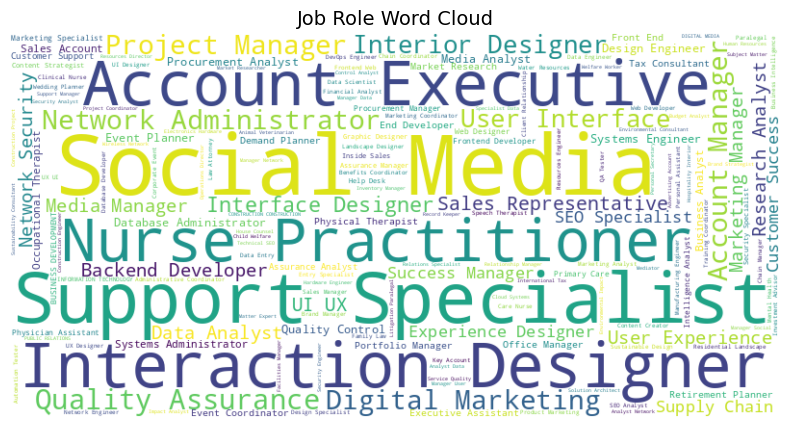

In [62]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Combine all job roles into a single string
text = " ".join(merged_resume['Job Role'].dropna())  # Remove NaNs if any

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.title("Job Role Word Cloud", fontsize=14)
plt.show()


# Preprocessing

✅ Extract important details like Name, Email, Phone, Skills, Job Title, Work Experience, Education, Companies Worked For, Certifications, Referees.

✅ Use regular expressions (regex) and NLP (spaCy) for extraction.

✅ Fill missing values using Faker (a Python library for generating
fake data).

Key Differences:
Model	Size	Vocabulary Size	Word Vectors	Accuracy (NER, POS)	Best Use Case

- en_core_web_sm	~12MB	~50k	No word vectors	Lower accuracy	Light-weight tasks, fast inference
- en_core_web_md	~43MB	~685k	300-dimensional word vectors	Medium accuracy	General NLP tasks with semantic similarity
- en_core_web_lg	~741MB	~1M	300-dimensional word vectors	Highest accuracy	Best for NER, dependency parsing, semantic tasks

Explanation:
- en_core_web_sm: Small model with no word vectors, only context-sensitive embeddings. Faster but less accurate.
- en_core_web_md: Medium-sized model with word vectors, providing better semantic similarity.
- en_core_web_lg: Large model with a bigger vocabulary and word vectors, best for deep NLP tasks

In [2]:
import pandas as pd
import numpy as np

merged_resume = pd.read_csv('/content/merged_resume_data_lemmatized.csv')
merged_resume.head()

,Job Role,Features
0,Social Media Manager,5 to 15 Years Digital Marketing Specialist soc...
1,Frontend Web Developer,2 to 12 Years web developer BCA HTML CSS JavaS...
2,Quality Control Manager,0 to 12 Years Operations Manager phd Quality c...
3,Wireless Network Engineer,4 to 11 Years Network Engineer phd Wireless ne...
4,Conference Manager,1 to 12 year Event Manager MBA Event planning ...


In [ ]:
!pip install transformers torch

In [3]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [4]:
import spacy
import pandas as pd
import re
from tqdm import tqdm
from transformers import pipeline

# Load SpaCy large vocabulary model
nlp_spacy = spacy.load("en_core_web_lg")

# Load Hugging Face transformer NER pipeline
ner_pipeline = pipeline("ner", model="dslim/bert-base-NER", aggregation_strategy="simple")

# Define function to extract named entities
def extract_entities(text):
    if pd.isna(text) or not isinstance(text, str):
        return {}

    entities = {
        "Applicant Name": None,
        "Phone": None,
        "Email": None,
        "Linkedin Address": None,
        "Years of Work Experience": None,
        "Skills": [],
        "Companies Worked For": [],
        "Education Background": [],
        "Education Institutions Attended": [],
        "Certifications": [],
        "Physical Address": None
    }

    # Process text with both SpaCy and Hugging Face
    doc_spacy = nlp_spacy(text)
    ner_results = ner_pipeline(text)

    # Extract name, company, location, and education from SpaCy
    for ent in doc_spacy.ents:
        if ent.label_ in ["PERSON"]:
            entities["Applicant Name"] = ent.text
        elif ent.label_ in ["ORG"]:
            entities["Companies Worked For"].append(ent.text)
        elif ent.label_ in ["GPE", "LOC"]:
            entities["Physical Address"] = ent.text
        elif ent.label_ in ["EDUCATIONAL_INSTITUTION"]:
            entities["Education Institutions Attended"].append(ent.text)

    # Extract named entities from Hugging Face transformer model
    for entity in ner_results:
        if entity["entity_group"] == "PER" and not entities["Applicant Name"]:
            entities["Applicant Name"] = entity["word"]
        elif entity["entity_group"] == "ORG":
            entities["Companies Worked For"].append(entity["word"])
        elif entity["entity_group"] == "LOC":
            entities["Physical Address"] = entity["word"]

    # Extract email, phone, LinkedIn, experience, and certifications using regex
    email_match = re.search(r"[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}", text)
    phone_match = re.search(r"\+?\d{1,4}[-.\s]?\(?\d{3}\)?[-.\s]?\d{3}[-.\s]?\d{4}", text)
    linkedin_match = re.search(r"https?://(?:www\.)?linkedin\.com/in/[a-zA-Z0-9_-]+", text)
    experience_match = re.search(r"(\d+)\s+(?:years|yrs)\s+experience", text, re.IGNORECASE)
    certification_match = re.findall(r"(Certified|Certificate|Certification):?\s*([\w\s]+)", text)

    if email_match:
        entities["Email"] = email_match.group(0)
    if phone_match:
        entities["Phone"] = phone_match.group(0)
    if linkedin_match:
        entities["Linkedin Address"] = linkedin_match.group(0)
    if experience_match:
        entities["Years of Work Experience"] = experience_match.group(1)
    if certification_match:
        entities["Certifications"] = [cert[1] for cert in certification_match]

    # Extract skills from keywords (example list, can be expanded)
    skills_list = ["Python", "Machine Learning", "Data Science", "SQL", "Java", "TensorFlow", "Keras", "NLP", "Deep Learning"]
    entities["Skills"] = [skill for skill in skills_list if skill.lower() in text.lower()]

    return entities

# Apply NER extraction with progress bar
tqdm.pandas()
ner_results = merged_resume["Features"].progress_apply(extract_entities)

# Convert to DataFrame
ner_df = pd.DataFrame(ner_results.tolist())

# Include 'Job Role' as 'Job Title'
ner_df.insert(0, "Job Title", merged_resume["Job Role"])

# Save results to CSV
ner_df.to_csv("resume_ner_extracted.csv", index=False)

print("NER extraction completed! Results saved to 'resume_ner_extracted.csv'.")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0
100%|██████████| 32483/32483 [19:32<00:00, 27.72it/s]


NER extraction completed! Results saved to 'resume_ner_extracted.csv'.


In [5]:
ner_extracted = pd.read_csv('/content/resume_ner_extracted.csv')
ner_extracted.head()

,Job Title,Applicant Name,Phone,Email,Linkedin Address,Years of Work Experience,Skills,Companies Worked For,Education Background,Education Institutions Attended,Certifications,Physical Address
0,Social Media Manager,NaN,NaN,NaN,NaN,NaN,[],"['Digital Marketing Specialist', 'Facebook', '...",[],[],[],NaN
1,Frontend Web Developer,NaN,NaN,NaN,NaN,NaN,['Java'],"['BCA', 'BCA', 'U']",[],[],[],NaN
2,Quality Control Manager,NaN,NaN,NaN,NaN,NaN,[],['Operations'],[],[],[],NaN
3,Wireless Network Engineer,NaN,NaN,NaN,NaN,NaN,[],"['Network Engineer', 'Wireless']",[],[],[],NaN
4,Conference Manager,NaN,NaN,NaN,NaN,NaN,[],['MBA'],[],[],[],NaN


In [6]:
ner_extracted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32483 entries, 0 to 32482
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Job Title                        32483 non-null  object 
 1   Applicant Name                   3301 non-null   object 
 2   Phone                            0 non-null      float64
 3   Email                            0 non-null      float64
 4   Linkedin Address                 0 non-null      float64
 5   Years of Work Experience         0 non-null      float64
 6   Skills                           32483 non-null  object 
 7   Companies Worked For             32483 non-null  object 
 8   Education Background             32483 non-null  object 
 9   Education Institutions Attended  32483 non-null  object 
 10  Certifications                   32483 non-null  object 
 11  Physical Address                 2700 non-null   object 
dtypes: float64(4), obj

In [7]:
ner_extracted.isnull().sum()

,0
Job Title,0
Applicant Name,29182
Phone,32483
Email,32483
Linkedin Address,32483
Years of Work Experience,32483
Skills,0
Companies Worked For,0
Education Background,0
Education Institutions Attended,0


To handle missing values in the extracted dataset:

✅ Generate synthetic values for missing fields:

Applicant Name: Generate random names.

Phone: Assign random phone numbers from different countries.

Email: Construct using the generated Applicant Name with different domains.

LinkedIn: Create URLs based on the generated Applicant Name.

Years of Work Experience: Assign a random number between 0 and 40 years.

Physical Address: Generate random city and country names.

In [9]:
ner_extracted.columns

Index(['Job Title', 'Applicant Name', 'Phone', 'Email', 'Linkedin Address',
       'Years of Work Experience', 'Skills', 'Companies Worked For',
       'Education Background', 'Education Institutions Attended',
       'Certifications', 'Physical Address'],
      dtype='object')

In [8]:
!pip install faker # install faker library

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 27.7 MB/s eta 0:00:00


Fill in missing values with synthetic ones

In [10]:
import pandas as pd
import random
import faker

# Initialize Faker for generating synthetic data
fake = faker.Faker()

# Define possible email domains and phone formats
email_domains = ["gmail.com", "yahoo.com", "outlook.com", "hotmail.com", "protonmail.com"]
phone_formats = [
    "+1-###-###-####",  # US
    "+44-####-######",  # UK
    "+91-#####-#####",  # India
    "+49-###-########",  # Germany
    "+33-#-##-##-##-##",  # France
]

# Function to generate synthetic values
def generate_synthetic_data(row):
    if pd.isna(row["Applicant Name"]):
        row["Applicant Name"] = fake.name()

    if pd.isna(row["Phone"]):
        row["Phone"] = fake.numerify(random.choice(phone_formats))

    if pd.isna(row["Email"]):
        name_part = row["Applicant Name"].lower().replace(" ", ".")
        row["Email"] = f"{name_part}@{random.choice(email_domains)}"

    if pd.isna(row["Linkedin Address"]):
        linkedin_part = row["Applicant Name"].lower().replace(" ", "-")
        row["Linkedin Address"] = f"https://www.linkedin.com/in/{linkedin_part}"

    if pd.isna(row["Years of Work Experience"]):
        row["Years of Work Experience"] = random.randint(0, 40)

    if pd.isna(row["Physical Address"]):
        row["Physical Address"] = f"{fake.city()}, {fake.country()}"

    return row

# Load dataset
ner_filled_clean = ner_extracted

# Apply function to fill missing values
ner_filled_clean = ner_filled_clean.apply(generate_synthetic_data, axis=1)

# Save the updated dataset
ner_filled_clean.to_csv("ner_filled_clean_dataset.csv", index=False)

print("Synthetic data filling complete. Updated dataset saved as 'ner_filled_clean_dataset.csv'.")


Synthetic data filling complete. Updated dataset saved as 'ner_filled_clean_dataset.csv'.


In [15]:
ner_filled_clean.head()

,Job Title,Applicant Name,Phone,Email,Linkedin Address,Years of Work Experience,Skills,Companies Worked For,Education Background,Education Institutions Attended,Certifications,Physical Address
0,Social Media Manager,Johnny Davidson,+49-101-66386554,johnny.davidson@yahoo.com,https://www.linkedin.com/in/johnny-davidson,16,[],"['Digital Marketing Specialist', 'Facebook', '...",[],[],[],"East Josephstad, Slovakia (Slovak Republic)"
1,Frontend Web Developer,Amanda Owen,+1-337-912-4766,amanda.owen@protonmail.com,https://www.linkedin.com/in/amanda-owen,26,['Java'],"['BCA', 'BCA', 'U']",[],[],[],"Lake Paulmouth, Saint Pierre and Miquelon"
2,Quality Control Manager,John Lowe,+1-253-734-6013,john.lowe@yahoo.com,https://www.linkedin.com/in/john-lowe,39,[],['Operations'],[],[],[],"Patriciaville, Iceland"
3,Wireless Network Engineer,David Spencer,+44-8358-811442,david.spencer@protonmail.com,https://www.linkedin.com/in/david-spencer,14,[],"['Network Engineer', 'Wireless']",[],[],[],"South Vincent, American Samoa"
4,Conference Manager,Jade Lopez,+33-6-42-03-88-59,jade.lopez@gmail.com,https://www.linkedin.com/in/jade-lopez,25,[],['MBA'],[],[],[],"Port Brittney, Malaysia"


In [12]:
ner_filled_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32483 entries, 0 to 32482
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Job Title                        32483 non-null  object
 1   Applicant Name                   32483 non-null  object
 2   Phone                            32483 non-null  object
 3   Email                            32483 non-null  object
 4   Linkedin Address                 32483 non-null  object
 5   Years of Work Experience         32483 non-null  int64 
 6   Skills                           32483 non-null  object
 7   Companies Worked For             32483 non-null  object
 8   Education Background             32483 non-null  object
 9   Education Institutions Attended  32483 non-null  object
 10  Certifications                   32483 non-null  object
 11  Physical Address                 32483 non-null  object
dtypes: int64(1), object(11)
memory u

In [14]:
ner_filled_clean.to_csv('/content/ner_filled_clean_dataset.csv', index=False)

# CLEAN STRUCTURED RESUME DATASET IN TABULAR FORM